# Actividad 18 de Enero del 2025
En el siguiente documento se hace un análisis de los datos proporcionados por la [INEGI](https://www.inegi.org.mx/programas/ccpv/2020/#tabulados) en los cuales se analiza la población creciente desde los años 1950 hasta el año 2020 en el municipio de **Chimalhuacán**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Década de 1950
### Lectura de datos Quinquenales 

In [12]:
df_q = pd.read_excel("Data_Economia_urbana/POBLACION/cgp50_mex_poblacion_cambiado.xlsx", sheet_name = "CGP50_Mex_Pob2_quinquenales")
df_q.fillna(0)
df_quinquenales = df_q[
    (df_q['Municipio']=='Chimalhuacán') & 
    (df_q['Grupos_quinquenales_de_edad']!='Total') & 
    (df_q['Grupos_quinquenales_de_edad']!='Edad no indicada')
    ]
df_quinquenales

,Entidad federativa,Municipio,Grupos_quinquenales_de_edad,Población_total,Poblacion_Hombres,Poblacion_Mujeres
626,México,Chimalhuacán,De 0 a 4 años,2051.0,990.0,1061.0
627,México,Chimalhuacán,De 5 a 9 años,1918.0,973.0,945.0
628,México,Chimalhuacán,De 10 a 14 años,1489.0,765.0,724.0
629,México,Chimalhuacán,De 15 a 19 años,1171.0,569.0,602.0
630,México,Chimalhuacán,De 20 a 24 años,1045.0,500.0,545.0
631,México,Chimalhuacán,De 25 a 29 años,1059.0,509.0,550.0
632,México,Chimalhuacán,De 30 a 34 años,767.0,393.0,374.0
633,México,Chimalhuacán,De 35 a 39 años,856.0,437.0,419.0
634,México,Chimalhuacán,De 40 a 44 años,619.0,330.0,289.0
635,México,Chimalhuacán,De 45 a 49 años,568.0,293.0,275.0


In [13]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 0 a 4 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 5 a 9 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 10 a 14 años')
    ]

df_filtrados_envejecimiento_Arriba = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 65 a 69 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 70 a 74 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 75 a 79 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 80 a 84 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 85 a 94 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 95 años y más') 
    ]

IEnvejecimiento_q = float(
    ((df_filtrados_envejecimiento_Arriba["Poblacion_Hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) / 
    (df_filtrados_envejecimiento_Abajo["Poblacion_Hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) *100
            )
IEnvejecimiento_q
print("Indice de Envejecimiento: ", IEnvejecimiento_q)

Indice de Envejecimiento:  9.765481861487725


In [14]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 0 a 4 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 5 a 9 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 10 a 14 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 65 a 69 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 70 a 74 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 75 a 79 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 80 a 84 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 85 a 94 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 95 años y más') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_Hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_Hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_Hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  46.223285240336395


### Índices
**Índice de Envejecimiento: 9.765481861487725**  
**Índice de Dependencia: 46.223285240336395**

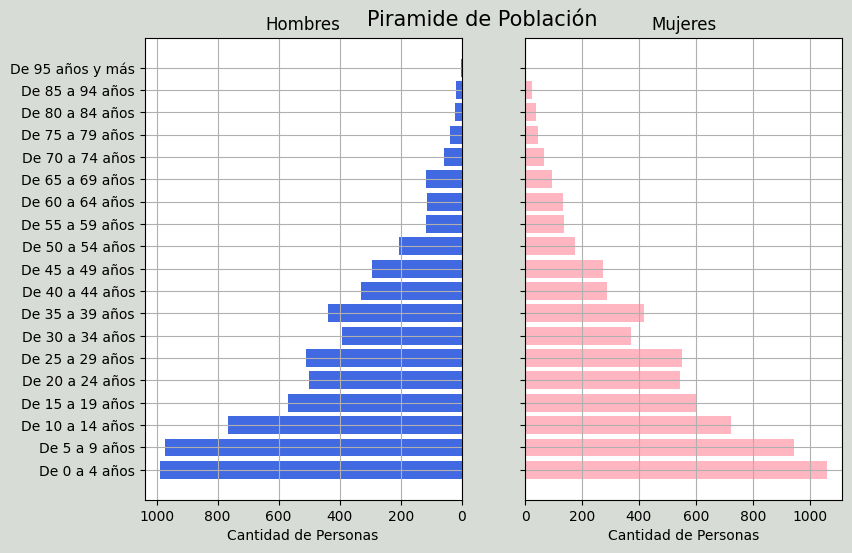

In [15]:
#definir límites para x and y
y = range(0, len(df_quinquenales))
x_male = df_quinquenales['Poblacion_Hombres']
x_female = df_quinquenales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_quinquenales['Poblacion_Hombres']
x_female = df_quinquenales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[1].set_xlabel("Cantidad de Personas")
#display plot 
plt.show()


### Datos Totales para 1950

In [16]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/cgp50_mex_poblacion_cambiado.xlsx", sheet_name = "CGP50_Mex_Pob3_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

,Entidad federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
2666,México,Chimalhuacán,Menores de 1 año,426.0,203.0,223.0
2667,México,Chimalhuacán,1 año,334.0,160.0,174.0
2668,México,Chimalhuacán,2 años,394.0,182.0,212.0
2669,México,Chimalhuacán,3 años,441.0,226.0,215.0
2670,México,Chimalhuacán,4 años,456.0,219.0,237.0
...,...,...,...,...,...,...
2748,México,Chimalhuacán,82 años,13.0,6.0,7.0
2749,México,Chimalhuacán,83 años,2.0,0.0,2.0
2750,México,Chimalhuacán,84 años,6.0,1.0,5.0
2751,México,Chimalhuacán,85 a 94 años,45.0,20.0,25.0


In [18]:
## Total de la poblacion
total_poblacion_1950 = int(df_totales["Poblacion_Total"].sum())
total_poblacion_h_1950 = int(df_totales["Poblacion_hombres"].sum())
total_poblacion_m_1950 = int(df_totales["Poblacion_Mujeres"].sum())
print("Total de Poblacion: ", total_poblacion_1950)
print("Total de Poblacion en Hombre: ", total_poblacion_h_1950)
print("Total de Poblacion en Mujeres: ", total_poblacion_m_1950)

Total de Poblacion:  12961
Total de Poblacion en Hombre:  6455
Total de Poblacion en Mujeres:  6506


### Total de Poblacion
* Hombres = 6455
* Mujeres = 6506
* Total = 12961

### Relación (Hombre y Mujer) y (Mujer y hombre)

In [84]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]


C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_22060\3299950799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_22060\3299950799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
2666,Chimalhuacán,Menores de 1 año,203.0,223.0,91.031390,109.852217
2667,Chimalhuacán,1 año,160.0,174.0,91.954023,108.750000
2668,Chimalhuacán,2 años,182.0,212.0,85.849057,116.483516
2669,Chimalhuacán,3 años,226.0,215.0,105.116279,95.132743
2670,Chimalhuacán,4 años,219.0,237.0,92.405063,108.219178
...,...,...,...,...,...,...
2748,Chimalhuacán,82 años,6.0,7.0,85.714286,116.666667
2749,Chimalhuacán,83 años,0.0,2.0,0.000000,NaN
2750,Chimalhuacán,84 años,1.0,5.0,20.000000,500.000000
2751,Chimalhuacán,85 a 94 años,20.0,25.0,80.000000,125.000000


In [124]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)


8.040017841925863


In [125]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  20.975524639348315


### Índices
**Índice de Dependencia: 8.040017841925863**  
**Índice de Envejecimiento: 20.975524639348315**

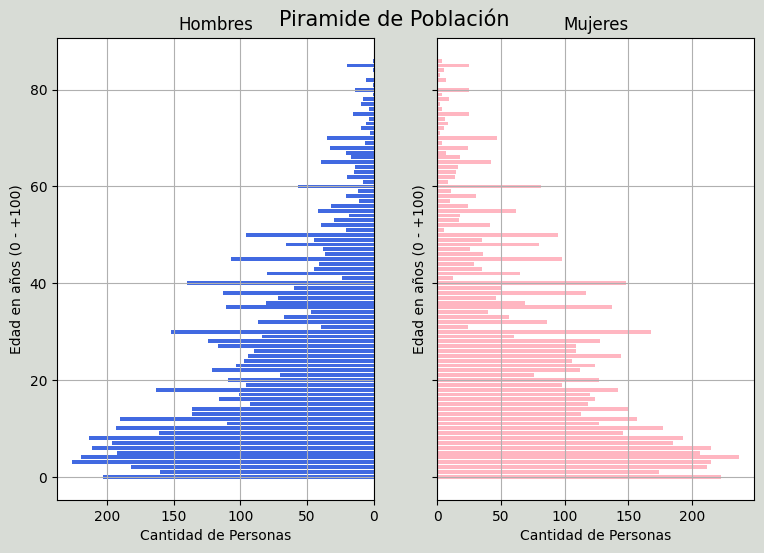

In [81]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()

## Década de 1960
Aquí no hay datos quinquenales, solo totales
### Lectura de datos Totales

In [21]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/cgp60_mex_poblacion_cambiado.xlsx", sheet_name = "CGP60_Mex_Pob8_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

,Entidad federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
3770,México,Chimalhuacán,De 0 a 4 años,14980.0,7546.0,7434.0
3771,México,Chimalhuacán,0 años,3014.0,1514.0,1500.0
3772,México,Chimalhuacán,- 0 meses,111.0,56.0,55.0
3773,México,Chimalhuacán,- 1 mes,400.0,210.0,190.0
3774,México,Chimalhuacán,- 2 meses,310.0,158.0,152.0
...,...,...,...,...,...,...
3893,México,Chimalhuacán,92 años,4.0,3.0,1.0
3894,México,Chimalhuacán,93 años,4.0,0.0,4.0
3895,México,Chimalhuacán,94 años,6.0,1.0,5.0
3896,México,Chimalhuacán,De 95 años y más,73.0,44.0,29.0


In [22]:
## Total de la poblacion
total_poblacion_1960 = int(df_totales["Poblacion_Total"].sum())
total_poblacion_h_1960 = int(df_totales["Poblacion_hombres"].sum())
total_poblacion_m_1960 = int(df_totales["Poblacion_Mujeres"].sum())
print("Total de Poblacion: ", total_poblacion_1960)
print("Total de Poblacion en Hombre: ", total_poblacion_h_1960)
print("Total de Poblacion en Mujeres: ", total_poblacion_m_1960)

Total de Poblacion:  156361
Total de Poblacion en Hombre:  78473
Total de Poblacion en Mujeres:  77888


### Total de Poblacion
* Hombres = 78473
* Mujeres = 77888
* Total = 156361

In [15]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]

C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_25500\3179420289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_25500\3179420289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
3770,Chimalhuacán,De 0 a 4 años,7546.0,7434.0,101.506591,98.515770
3771,Chimalhuacán,0 años,1514.0,1500.0,100.933333,99.075297
3772,Chimalhuacán,- 0 meses,56.0,55.0,101.818182,98.214286
3773,Chimalhuacán,- 1 mes,210.0,190.0,110.526316,90.476190
3774,Chimalhuacán,- 2 meses,158.0,152.0,103.947368,96.202532
...,...,...,...,...,...,...
3893,Chimalhuacán,92 años,3.0,1.0,300.000000,33.333333
3894,Chimalhuacán,93 años,0.0,4.0,0.000000,NaN
3895,Chimalhuacán,94 años,1.0,5.0,20.000000,500.000000
3896,Chimalhuacán,De 95 años y más,44.0,29.0,151.724138,65.909091


In [17]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)

8.287528842547633


In [18]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  15.170491615038129


## Índices
**Índice de Dependencia: 8.287528842547633**  
**Índice de Envejecimiento: 15.170491615038129**

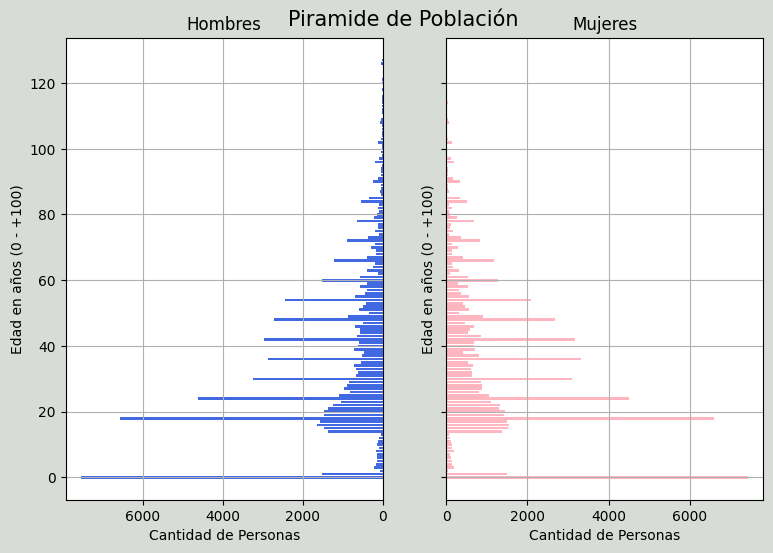

In [19]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()

## Década de 1970
### Lectura de Datos Quinquenales

In [23]:
df_q = pd.read_excel("Data_Economia_urbana/POBLACION/cgp70_mex_poblacion_cambiado.xlsx", sheet_name = "CGP70_Mex_Pob3_quinquenales")
df_q.fillna(0)
df_quinquenales = df_q[
    (df_q['Municipio']=='Chimalhuacán') & 
    (df_q['Grupos_quinquenales_de_edad']!='Total') & 
    (df_q['Grupos_quinquenales_de_edad']!='Edad no indicada')
    ]
df_quinquenales

,Entidad federativa,Municipio,Grupos_quinquenales_de_edad,Poblacion_Total,Poblacion_Hombres,Poblacion_Mujeres
590,México,Chimalhuacán,De 0 a 4 años,3586.0,1781.0,1805.0
591,México,Chimalhuacán,De 5 a 9 años,3317.0,1633.0,1684.0
592,México,Chimalhuacán,De 10 a 14 años,2695.0,1370.0,1325.0
593,México,Chimalhuacán,De 15 a 19 años,1954.0,971.0,983.0
594,México,Chimalhuacán,De 20 a 24 años,1668.0,792.0,876.0
595,México,Chimalhuacán,De 25 a 29 años,1312.0,675.0,637.0
596,México,Chimalhuacán,De 30 a 34 años,972.0,505.0,467.0
597,México,Chimalhuacán,De 35 a 39 años,1041.0,542.0,499.0
598,México,Chimalhuacán,De 40 a 44 años,783.0,415.0,368.0
599,México,Chimalhuacán,De 45 a 49 años,645.0,334.0,311.0


In [24]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 0 a 4 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 5 a 9 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 10 a 14 años')
    ]

df_filtrados_envejecimiento_Arriba = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 65 a 69 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 70 a 74 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 75 a 79 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 80 a 84 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']=='De 85 a 94 años') | (df_quinquenales['Grupos_quinquenales_de_edad']=='De 95 años y más') 
    ]

IEnvejecimiento_q = float(
    ((df_filtrados_envejecimiento_Arriba["Poblacion_Hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) / 
    (df_filtrados_envejecimiento_Abajo["Poblacion_Hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) *100
            )
IEnvejecimiento_q
print("Indice de Envejecimiento: ", IEnvejecimiento_q)

Indice de Envejecimiento:  7.376536778495519


In [25]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_quinquenales[
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 0 a 4 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 5 a 9 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 10 a 14 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 65 a 69 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 70 a 74 años') | 
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 75 a 79 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 80 a 84 años') |
    (df_quinquenales['Grupos_quinquenales_de_edad']!='De 85 a 94 años') | (df_quinquenales['Grupos_quinquenales_de_edad']!='De 95 años y más') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_Hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_Hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_Hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  51.66950767071092


### Índices
**Índice de Envejecimiento: 7.376536778495519**  
**Índice de Dependencia: 51.66950767071092**

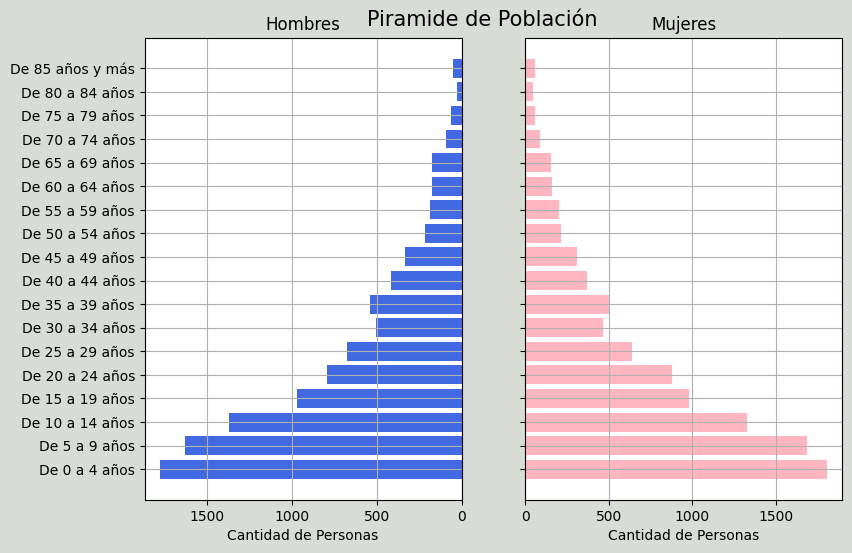

In [28]:
#definir límites para x and y
y = range(0, len(df_quinquenales))
x_male = df_quinquenales['Poblacion_Hombres']
x_female = df_quinquenales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_quinquenales['Poblacion_Hombres']
x_female = df_quinquenales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[1].set_xlabel("Cantidad de Personas")
#display plot 
plt.show()

## Datos totales para 1970

In [26]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/cgp70_mex_poblacion_cambiado.xlsx", sheet_name = "CGP70_Mex_Pob4_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

,Entidad federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
3217,México,Chimalhuacán,De 0 a 4 años,3586.0,1781.0,1805.0
3218,México,Chimalhuacán,0 años,773.0,381.0,392.0
3219,México,Chimalhuacán,1 año,652.0,339.0,313.0
3220,México,Chimalhuacán,2 años,705.0,362.0,343.0
3221,México,Chimalhuacán,3 años,707.0,348.0,359.0
...,...,...,...,...,...,...
3315,México,Chimalhuacán,81 años,10.0,4.0,6.0
3316,México,Chimalhuacán,82 años,11.0,7.0,4.0
3317,México,Chimalhuacán,83 años,8.0,1.0,7.0
3318,México,Chimalhuacán,84 años,8.0,3.0,5.0


In [27]:
## Total de la poblacion
total_poblacion_1970 = int(df_totales["Poblacion_Total"].sum())
total_poblacion_h_1970 = int(df_totales["Poblacion_hombres"].sum())
total_poblacion_m_1970 = int(df_totales["Poblacion_Mujeres"].sum())
print("Total de Poblacion: ", total_poblacion_1970)
print("Total de Poblacion en Hombre: ", total_poblacion_h_1970)
print("Total de Poblacion en Mujeres: ", total_poblacion_m_1970)

Total de Poblacion:  39783
Total de Poblacion en Hombre:  19949
Total de Poblacion en Mujeres:  19834


## Total de Población
* Hombres: 19949  
* Mujeres: 19834
* Total: 39783

## Relación (Hombre y Mujer) y (Mujer y hombre)

In [31]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]

C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_25500\3179420289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_25500\3179420289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
3217,Chimalhuacán,De 0 a 4 años,1781.0,1805.0,98.670360,101.347558
3218,Chimalhuacán,0 años,381.0,392.0,97.193878,102.887139
3219,Chimalhuacán,1 año,339.0,313.0,108.306709,92.330383
3220,Chimalhuacán,2 años,362.0,343.0,105.539359,94.751381
3221,Chimalhuacán,3 años,348.0,359.0,96.935933,103.160920
...,...,...,...,...,...,...
3315,Chimalhuacán,81 años,4.0,6.0,66.666667,150.000000
3316,Chimalhuacán,82 años,7.0,4.0,175.000000,57.142857
3317,Chimalhuacán,83 años,1.0,7.0,14.285714,700.000000
3318,Chimalhuacán,84 años,3.0,5.0,60.000000,166.666667


In [32]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)

6.294933224648851


In [33]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  15.937224028722557


## Índices
**Índice de Dependencia: 15.937224028722557**  
**Índice de Envejecimiento: 6.294933224648851**

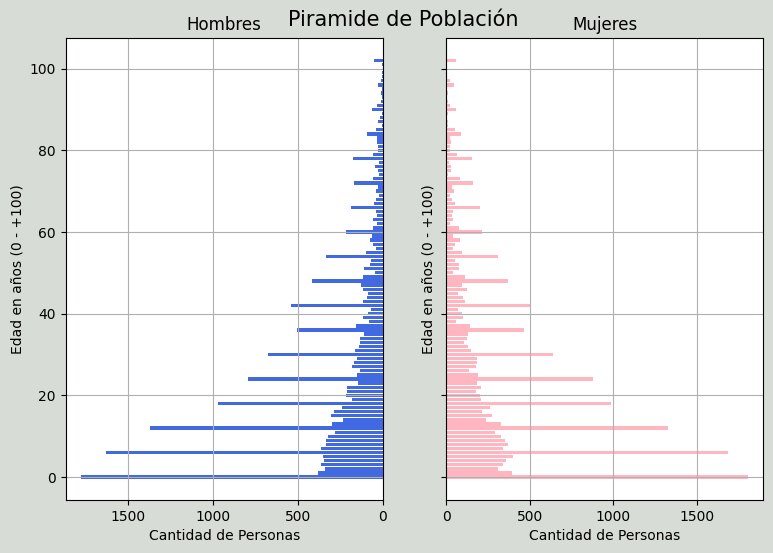

In [34]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()

## Década de 1980
No hay datos quinquenales, solo totales

In [47]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/cpyv80_mex_poblacion_cambiado.xlsx", sheet_name = "CPyV80_Mex_Pob1_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

,Entidad federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
3728,15 México,Chimalhuacán,0 a 4 años,9986.0,5130.0,4856.0
3729,15 México,Chimalhuacán,0 años,1754.0,900.0,854.0
3730,15 México,Chimalhuacán,1 años,1727.0,907.0,820.0
3731,15 México,Chimalhuacán,2 años,1984.0,1005.0,979.0
3732,15 México,Chimalhuacán,3 años,2186.0,1135.0,1051.0
...,...,...,...,...,...,...
3845,15 México,Chimalhuacán,97 años,3.0,0.0,3.0
3846,15 México,Chimalhuacán,98 años,4.0,2.0,2.0
3847,15 México,Chimalhuacán,99 años,1.0,0.0,1.0
3848,15 México,Chimalhuacán,100 y más años,16.0,9.0,7.0


In [48]:
## Total de la poblacion
total_poblacion_1980 = int(df_totales["Poblacion_Total"].sum())
total_poblacion_h_1980 = int(df_totales["Poblacion_hombres"].sum())
total_poblacion_m_1980 = int(df_totales["Poblacion_Mujeres"].sum())
print("Total de Poblacion: ", total_poblacion_1980)
print("Total de Poblacion en Hombre: ", total_poblacion_h_1980)
print("Total de Poblacion en Mujeres: ", total_poblacion_m_1980)

Total de Poblacion:  123475
Total de Poblacion en Hombre:  61967
Total de Poblacion en Mujeres:  61508


### Total
* Hombres: 61967
* Mujeres: 61508
* Totales: 61508

In [39]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]

C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_25500\3179420289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_25500\3179420289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
3728,Chimalhuacán,0 a 4 años,5130.0,4856.0,105.642504,94.658869
3729,Chimalhuacán,0 años,900.0,854.0,105.386417,94.888889
3730,Chimalhuacán,1 años,907.0,820.0,110.609756,90.407938
3731,Chimalhuacán,2 años,1005.0,979.0,102.655771,97.412935
3732,Chimalhuacán,3 años,1135.0,1051.0,107.992388,92.599119
...,...,...,...,...,...,...
3845,Chimalhuacán,97 años,0.0,3.0,0.000000,NaN
3846,Chimalhuacán,98 años,2.0,2.0,100.000000,100.000000
3847,Chimalhuacán,99 años,0.0,1.0,0.000000,NaN
3848,Chimalhuacán,100 y más años,9.0,7.0,128.571429,77.777778


In [40]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)

6.8426094150417445


In [41]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  16.797281232386915


### Índices
**Índice de Dependencia: 6.8426094150417445**  
**Índice de Envejecimiento: 16.797281232386915**

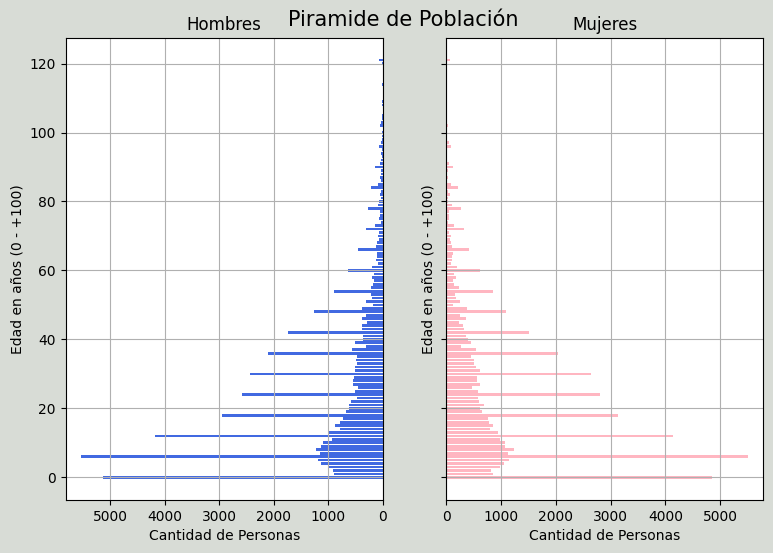

In [42]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()

## Década 1990
Solo hay datos quinquenales.

In [5]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/CPyV90_mex_Poblacion_cambiado.xlsx", sheet_name = "CPyV90_Mex_POB2_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

,Entidad federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
3772,15 México,Chimalhuacán,Población total,242317.0,120940.0,121377.0
3773,15 México,Chimalhuacán,0 años,6766.0,3376.0,3390.0
3774,15 México,Chimalhuacán,1 año,6112.0,3120.0,2992.0
3775,15 México,Chimalhuacán,2 años,7056.0,3603.0,3453.0
3776,15 México,Chimalhuacán,3 años,7790.0,3860.0,3930.0
...,...,...,...,...,...,...
3890,15 México,Chimalhuacán,98 años,11.0,2.0,9.0
3891,15 México,Chimalhuacán,99 años,8.0,2.0,6.0
3892,15 México,Chimalhuacán,95 - 99 años,51.0,16.0,35.0
3893,15 México,Chimalhuacán,100 y más años,33.0,16.0,17.0


In [42]:
## Total de la poblacion
total_poblacion_1990 = int(df_totales["Poblacion_Total"].sum())
total_poblacion_h_1990 = int(df_totales["Poblacion_hombres"].sum())
total_poblacion_m_1990 = int(df_totales["Poblacion_Mujeres"].sum())
print("Total de Poblacion: ", total_poblacion_1990)
print("Total de Poblacion en Hombre: ", total_poblacion_h_1990)
print("Total de Poblacion en Mujeres: ", total_poblacion_m_1990)

Total de Poblacion:  961442
Total de Poblacion en Hombre:  476695
Total de Poblacion en Mujeres:  484747


## Total de Población
* Hombres: 476695
* Mujeres: 484747
* Total: 961442

## Relación (Hombre y Mujer) y (Mujer y hombre)

In [31]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]

C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_15108\3179420289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_15108\3179420289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
3728,Chimalhuacán,0 a 4 años,5130.0,4856.0,105.642504,94.658869
3729,Chimalhuacán,0 años,900.0,854.0,105.386417,94.888889
3730,Chimalhuacán,1 años,907.0,820.0,110.609756,90.407938
3731,Chimalhuacán,2 años,1005.0,979.0,102.655771,97.412935
3732,Chimalhuacán,3 años,1135.0,1051.0,107.992388,92.599119
...,...,...,...,...,...,...
3845,Chimalhuacán,97 años,0.0,3.0,0.000000,NaN
3846,Chimalhuacán,98 años,2.0,2.0,100.000000,100.000000
3847,Chimalhuacán,99 años,0.0,1.0,0.000000,NaN
3848,Chimalhuacán,100 y más años,9.0,7.0,128.571429,77.777778


In [7]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)

8.300148495771838


In [8]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  12.988237950647394


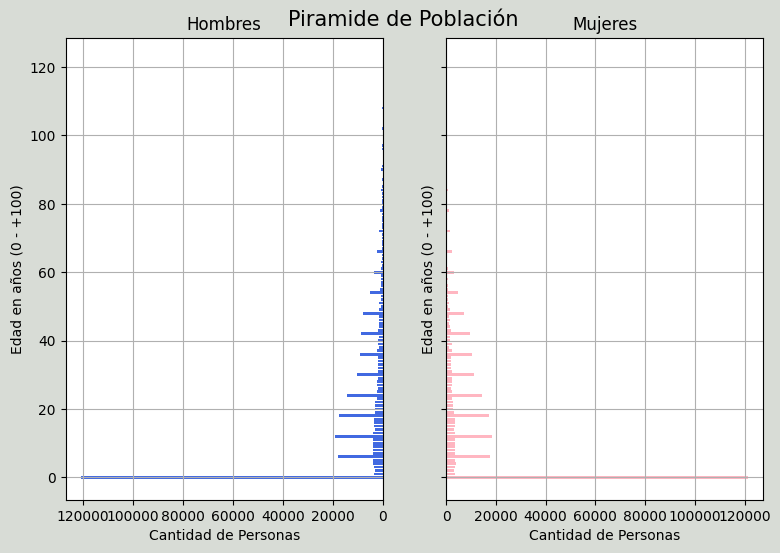

In [9]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()

## Década 2000
Solo hay datos Totales

In [39]:
df_t = pd.read_excel("Data_Economia_urbana/POBLACION/CPyV2000_Mex_Poblacion_cambiado.xlsx", sheet_name = "CPyV2000_Mex_POB2_totales")
df_t.fillna(0)
df_totales = df_t[
    (df_t['Municipio']=='Chimalhuacán') & 
    (df_t['Grupos_año_edad']!='Total') & 
    (df_t['Grupos_año_edad']!='Número de ciudadanos mexicanos /1') &
    (df_t['Grupos_año_edad']!='Edad no indicada')
    ]
df_totales

C:\Users\hernan.cabrera\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Entidad_federativa,Municipio,Grupos_año_edad,Poblacion_Total,Poblacion_hombres,Poblacion_Mujeres
3176,15 México,Chimalhuacán,0 años,11221.0,5672.0,5549.0
3177,15 México,Chimalhuacán,1 año,11170.0,5667.0,5503.0
3178,15 México,Chimalhuacán,2 años,11500.0,5847.0,5653.0
3179,15 México,Chimalhuacán,3 años,11655.0,5947.0,5708.0
3180,15 México,Chimalhuacán,4 años,12511.0,6251.0,6260.0
...,...,...,...,...,...,...
3293,15 México,Chimalhuacán,98 años,30.0,15.0,15.0
3294,15 México,Chimalhuacán,99 años,31.0,12.0,19.0
3295,15 México,Chimalhuacán,95 - 99 años,124.0,46.0,78.0
3296,15 México,Chimalhuacán,100 y más años,61.0,28.0,33.0


In [41]:
## Total de la poblacion
total_poblacion_2000 = int(df_totales["Poblacion_Total"].sum())
total_poblacion_h_2000 = int(df_totales["Poblacion_hombres"].sum())
total_poblacion_m_2000 = int(df_totales["Poblacion_Mujeres"].sum())
print("Total de Poblacion: ", total_poblacion_2000)
print("Total de Poblacion en Hombre: ", total_poblacion_h_2000)
print("Total de Poblacion en Mujeres: ", total_poblacion_m_2000)

Total de Poblacion:  961442
Total de Poblacion en Hombre:  476695
Total de Poblacion en Mujeres:  484747


## Población total
* Hombres = 476695
* Mujeres = 484747
* Total = 961442

In [43]:
###### Creación de nuevas columnas
df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
df_totales.replace([np.inf, -np.inf], np.nan, inplace=True)
df_totales.dropna(subset=["Relacion_Hombre_mujer", "Relacion_Mujer_hombre"], how="all", inplace=True)
df_totales[["Municipio", "Grupos_año_edad", "Poblacion_hombres", "Poblacion_Mujeres", "Relacion_Hombre_mujer", "Relacion_Mujer_hombre"]]

C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_15108\3179420289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Hombre_mujer"] = (df_totales["Poblacion_hombres"]/df_totales["Poblacion_Mujeres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel_15108\3179420289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Relacion_Mujer_hombre"] = (df_totales["Poblacion_Mujeres"]/df_totales["Poblacion_hombres"])*100
C:\Users\hernan.cabrera\AppData\Local\Temp\ipykernel

,Municipio,Grupos_año_edad,Poblacion_hombres,Poblacion_Mujeres,Relacion_Hombre_mujer,Relacion_Mujer_hombre
3176,Chimalhuacán,0 años,5672.0,5549.0,102.216616,97.831453
3177,Chimalhuacán,1 año,5667.0,5503.0,102.980193,97.106053
3178,Chimalhuacán,2 años,5847.0,5653.0,103.431806,96.682059
3179,Chimalhuacán,3 años,5947.0,5708.0,104.187106,95.981167
3180,Chimalhuacán,4 años,6251.0,6260.0,99.856230,100.143977
...,...,...,...,...,...,...
3293,Chimalhuacán,98 años,15.0,15.0,100.000000,100.000000
3294,Chimalhuacán,99 años,12.0,19.0,63.157895,158.333333
3295,Chimalhuacán,95 - 99 años,46.0,78.0,58.974359,169.565217
3296,Chimalhuacán,100 y más años,28.0,33.0,84.848485,117.857143


In [44]:
### Indice de Envejecimiento
df_filtrados_envejecimiento_Abajo = df_t[
    (df_t['Grupos_año_edad']=='Menores de 1 año') | 
    (df_t['Grupos_año_edad']=='1 año') |
    (df_t['Grupos_año_edad']=='2 años') |
    (df_t['Grupos_año_edad']=='3 años') |
    (df_t['Grupos_año_edad']=='4 años') |
    (df_t['Grupos_año_edad']=='5 años') |
    (df_t['Grupos_año_edad']=='6 años') |
    (df_t['Grupos_año_edad']=='7 años') |
    (df_t['Grupos_año_edad']=='8 años') |
    (df_t['Grupos_año_edad']=='9 años') |
    (df_t['Grupos_año_edad']=='10 años') |
    (df_t['Grupos_año_edad']=='11 años') |
    (df_t['Grupos_año_edad']=='12 años') |
    (df_t['Grupos_año_edad']=='13 años') |
    (df_t['Grupos_año_edad']=='14 años') 
    ]
df_filtrados_envejecimiento_Arriba = df_t[
    (df_t['Grupos_año_edad']=='65 años') | (df_t['Grupos_año_edad']=='66 años') | (df_t['Grupos_año_edad']=='67 años') | (df_t['Grupos_año_edad']=='68 años') |
    (df_t['Grupos_año_edad']=='69 años') | (df_t['Grupos_año_edad']=='70 años') | (df_t['Grupos_año_edad']=='71 años') | (df_t['Grupos_año_edad']=='72 años') |
    (df_t['Grupos_año_edad']=='73 años') | (df_t['Grupos_año_edad']=='74 años') | (df_t['Grupos_año_edad']=='75 años') | (df_t['Grupos_año_edad']=='76 años') |
    (df_t['Grupos_año_edad']=='77 años') | (df_t['Grupos_año_edad']=='78 años') | (df_t['Grupos_año_edad']=='79 años') | (df_t['Grupos_año_edad']=='80 años') |
    (df_t['Grupos_año_edad']=='81 años') | (df_t['Grupos_año_edad']=='82 años') | (df_t['Grupos_año_edad']=='83 años') | (df_t['Grupos_año_edad']=='84 años') |
    (df_t['Grupos_año_edad']=='85 años') | (df_t['Grupos_año_edad']=='86 años') | (df_t['Grupos_año_edad']=='87 años') | (df_t['Grupos_año_edad']=='88 años') |
    (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='89 años') | (df_t['Grupos_año_edad']=='90 años') | (df_t['Grupos_año_edad']=='92 años') |
    (df_t['Grupos_año_edad']=='92 años') | (df_t['Grupos_año_edad']=='93 años') | (df_t['Grupos_año_edad']=='94 años') | (df_t['Grupos_año_edad']=='95 años') |
    (df_t['Grupos_año_edad']=='96 años') | (df_t['Grupos_año_edad']=='97 años') | (df_t['Grupos_año_edad']=='98 años') | (df_t['Grupos_año_edad']=='99 años') |
    (df_t['Grupos_año_edad']=='100 años') | (df_t['Grupos_año_edad']=='101 años') | (df_t['Grupos_año_edad']=='102 años') | (df_t['Grupos_año_edad']=='103 años') |
    (df_t['Grupos_año_edad']=='104 años') | (df_t['Grupos_año_edad']=='105 años') | (df_t['Grupos_año_edad']=='106 años') | (df_t['Grupos_año_edad']=='107 años') |
    (df_t['Grupos_año_edad']=='108 años') 
    ]
IE = float((
        df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + 
        df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()
    ) / 
    (
        df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() + 
    df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum()
    ))*100
print(IE)

11.976057556843218


In [45]:
### Indice de Dependencia
df_filtrados_envejecimiento_Enmedio = df_t[
    (df_t['Grupos_año_edad']!='Menores de 1 año') | 
    (df_t['Grupos_año_edad']!='1 año') |
    (df_t['Grupos_año_edad']!='2 años') |
    (df_t['Grupos_año_edad']!='3 años') |
    (df_t['Grupos_año_edad']!='4 años') |
    (df_t['Grupos_año_edad']!='5 años') |
    (df_t['Grupos_año_edad']!='6 años') |
    (df_t['Grupos_año_edad']!='7 años') |
    (df_t['Grupos_año_edad']!='8 años') |
    (df_t['Grupos_año_edad']!='9 años') |
    (df_t['Grupos_año_edad']!='10 años') |
    (df_t['Grupos_año_edad']!='11 años') |
    (df_t['Grupos_año_edad']!='12 años') |
    (df_t['Grupos_año_edad']!='13 años') |
    (df_t['Grupos_año_edad']!='14 años') |
    (df_t['Grupos_año_edad']!='65 años') | (df_t['Grupos_año_edad']!='66 años') | (df_t['Grupos_año_edad']!='67 años') | (df_t['Grupos_año_edad']!='68 años') |
    (df_t['Grupos_año_edad']!='69 años') | (df_t['Grupos_año_edad']!='70 años') | (df_t['Grupos_año_edad']!='71 años') | (df_t['Grupos_año_edad']!='72 años') |
    (df_t['Grupos_año_edad']!='73 años') | (df_t['Grupos_año_edad']!='74 años') | (df_t['Grupos_año_edad']!='75 años') | (df_t['Grupos_año_edad']!='76 años') |
    (df_t['Grupos_año_edad']!='77 años') | (df_t['Grupos_año_edad']!='78 años') | (df_t['Grupos_año_edad']!='79 años') | (df_t['Grupos_año_edad']!='80 años') |
    (df_t['Grupos_año_edad']!='81 años') | (df_t['Grupos_año_edad']!='82 años') | (df_t['Grupos_año_edad']!='83 años') | (df_t['Grupos_año_edad']!='84 años') |
    (df_t['Grupos_año_edad']!='85 años') | (df_t['Grupos_año_edad']!='86 años') | (df_t['Grupos_año_edad']!='87 años') | (df_t['Grupos_año_edad']!='88 años') |
    (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='89 años') | (df_t['Grupos_año_edad']!='90 años') | (df_t['Grupos_año_edad']!='92 años') |
    (df_t['Grupos_año_edad']!='92 años') | (df_t['Grupos_año_edad']!='93 años') | (df_t['Grupos_año_edad']!='94 años') | (df_t['Grupos_año_edad']!='95 años') |
    (df_t['Grupos_año_edad']!='96 años') | (df_t['Grupos_año_edad']!='97 años') | (df_t['Grupos_año_edad']!='98 años') | (df_t['Grupos_año_edad']!='99 años') |
    (df_t['Grupos_año_edad']!='100 años') | (df_t['Grupos_año_edad']!='101 años') | (df_t['Grupos_año_edad']!='102 años') | (df_t['Grupos_año_edad']!='103 años') |
    (df_t['Grupos_año_edad']!='104 años') | (df_t['Grupos_año_edad']!='105 años') | (df_t['Grupos_año_edad']!='106 años') | (df_t['Grupos_año_edad']!='107 años') |
    (df_t['Grupos_año_edad']!='108 años') 
    ]
IDependencia = float((
    ((df_filtrados_envejecimiento_Arriba["Poblacion_hombres"].sum() + df_filtrados_envejecimiento_Arriba["Poblacion_Mujeres"].sum()) + 
    (df_filtrados_envejecimiento_Abajo["Poblacion_hombres"].sum() +df_filtrados_envejecimiento_Abajo["Poblacion_Mujeres"].sum())) /
    (df_filtrados_envejecimiento_Enmedio["Poblacion_hombres"].sum()+ df_filtrados_envejecimiento_Enmedio["Poblacion_Mujeres"].sum())
            )*100)
print("Indice de Dependencia: ", IDependencia)

Indice de Dependencia:  11.321194939410303


## Índices
**Índice de Dependencia: 11.321194939410303**  
**Índice de Envejecimiento: 11.976057556843218**

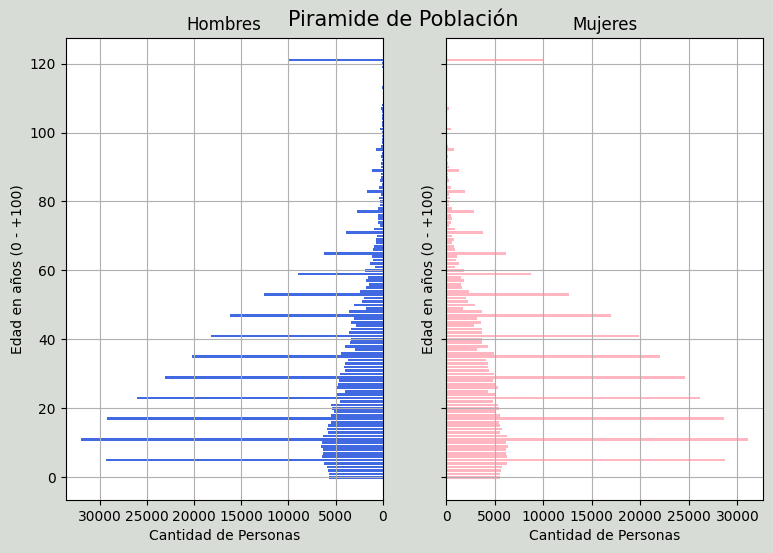

In [46]:
#definir límites para x and y
y = range(0, len(df_totales))
x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']

#define los parámetros de la trama
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#especifique el color de fondo y el título de la trama
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Piramide de Población", fontsize=15, ha='center')

x_male = df_totales['Poblacion_hombres']
x_female = df_totales['Poblacion_Mujeres']#definir barras masculinas y femeninas
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Hombres')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Mujeres')

# ajuste los parámetros de la cuadrícula y especifique etiquetas para el eje y
axes[1].grid()
#axes[0].set(yticks=y, yticklabels=df_quinquenales['Grupos_quinquenales_de_edad'])
axes[0].invert_xaxis()
axes[0].grid()

# Etiquetas
axes[0].set_xlabel("Cantidad de Personas")
axes[0].set_ylabel("Edad en años (0 - +100)")

axes[1].set_xlabel("Cantidad de Personas")
axes[1].set_ylabel("Edad en años (0 - +100)")

#display plot 
plt.show()

## Grafica y tabla de Urbanidad

In [58]:
dt_totales_f = pd.DataFrame()
dt_totales_f["Decada"] = [1950, 1960, 1970, 1980, 1990, 2000]
dt_totales_f["Hombres"] = [6455, 78473, 19949, 61967, 476695, 476695]
dt_totales_f["Mujeres"] = [6506, 77888, 19834, 61508, 484747, 484747]
dt_totales_f["Totales"] = [12961, 156361, 39783, 61508, 961442, 961442]
dt_totales_f["% Poblacional"] = [((12961/12961)-1)*100, -((12961/156361)-1)*100, ((156361/39783)-1)*100, -((39783/61508)-1)*100, -((61508/961442)-1)*100, ((961442/961442)-1)*100]
dt_totales_f

,Decada,Hombres,Mujeres,Totales,% Poblacional
0,1950,6455,6506,12961,0.000000
1,1960,78473,77888,156361,91.710849
2,1970,19949,19834,39783,293.034713
3,1980,61967,61508,61508,35.320609
4,1990,476695,484747,961442,93.602526
5,2000,476695,484747,961442,0.000000


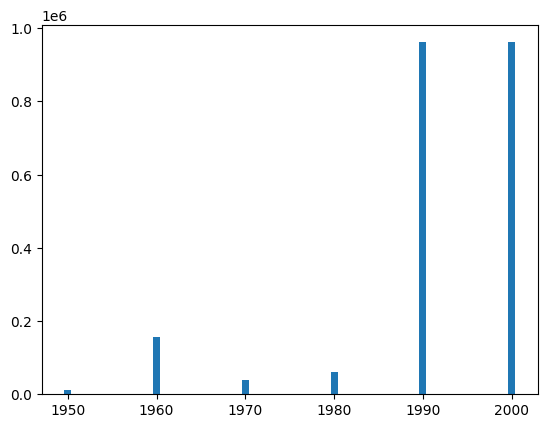

In [59]:
plt.bar(dt_totales_f["Decada"], dt_totales_f["Totales"])
plt.show()